In [124]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel, BertConfig
from core.analysis import annotate_mtx

<Figure size 432x288 with 0 Axes>

In [6]:
model_config = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states = True,
                                          output_attentions = True)

In [8]:
model = BertModel.from_pretrained('bert-base-uncased', config = model_config)

In [161]:
def plot_attn_mtx(sentence, target):
    data = preprocess(sentence, target)
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenized_text = tokenizer.tokenize(sentence)
    indexed_tokens = data[0]
    segments_ids = data[1]
    target_token_index = data[2]

    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    with torch.no_grad():
        outputs = model(tokens_tensor)
    attention = outputs[3]
    #This is attention at the last layer
    last_attn = attention[11]
    summed_heads = torch.sum(last_attn, dim = 1) #Summed the results from all the attention heads to get this
    attn_mtx = summed_heads[0][1:-1, 1:-1]
    fig = plt.figure(figsize = (10, 8))
    ax = plt.subplot()
    im = plt.imshow(attn_mtx)
    annotate_mtx(attn_mtx.numpy(), im, ax, tokenized_text, write_text = True)

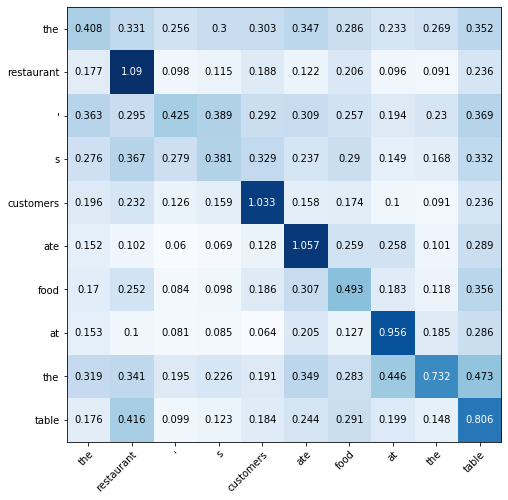

In [165]:
plot_attn_mtx("The restaurant's customers ate food at the table", "table")

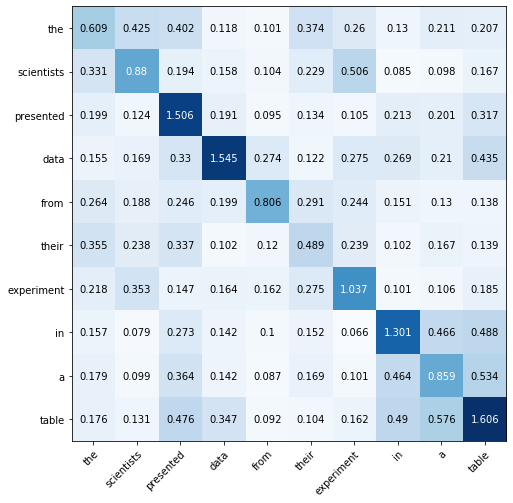

In [166]:
plot_attn_mtx("The scientists presented data from their experiment in a table", "table")